## <center>Тема “Обучение без учителя”
#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston
boston=load_boston()

In [6]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage of dataframe is {start_mem:.2f} MB')
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is: {end_mem:.2f} MB')
    print(f'Decreased by {100 * (start_mem - end_mem) / start_mem:.1f}%')
    
    return df

Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [7]:
X=pd.DataFrame(boston.data, columns=boston.feature_names)
y=boston.target

X=reduce_mem_usage(X)

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.03 MB
Decreased by 49.9%


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [9]:
scaler=StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)
X_train_tsne=tsne.fit_transform(X_train_scaled)

In [11]:
X_train_scaled.shape

(404, 13)

In [12]:
X_train_tsne.shape

(404, 2)

Постройте диаграмму рассеяния на этих данных.

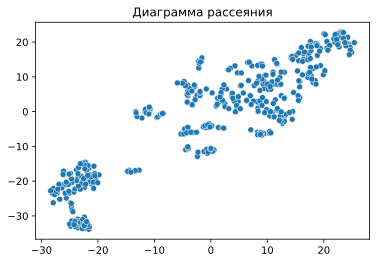

In [13]:
sns.scatterplot(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('Диаграмма рассеяния')
plt.show()

#plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
#plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [38]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, max_iter=100, random_state=42)

train_labels=model.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

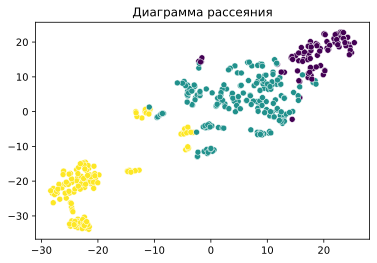

In [39]:
sns.scatterplot(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.title('Диаграмма рассеяния')
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [40]:
for n in list(set(train_labels)):
    print(f'Cluster {n}:\n\tMean price: {y_train[train_labels==n].mean()};'
    f'\tMean CRIM: {X_train.CRIM[train_labels==n].mean()}.')

Cluster 0:
	Mean price: 27.87411764705882;	Mean CRIM: 0.07211847603321075.
Cluster 1:
	Mean price: 24.971204188481675;	Mean CRIM: 0.4209856688976288.
Cluster 2:
	Mean price: 16.1796875;	Mean CRIM: 10.715219497680664.


#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [41]:
test_labels=model.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [42]:
for n in list(set(test_labels)):
    print(f'Cluster {n}:\n\tMean price: {y_test[test_labels==n].mean()};'
    f'\tMean CRIM: {X_test.CRIM[test_labels==n].mean()}.')

Cluster 0:
	Mean price: 31.35;	Mean CRIM: 0.062059998512268066.
Cluster 1:
	Mean price: 21.860784313725492;	Mean CRIM: 0.2660788297653198.
Cluster 2:
	Mean price: 16.43714285714286;	Mean CRIM: 10.165532112121582.
